In [8]:
%run ./utils.ipynb

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
estado_1 = 'RS'
municipio_1 = '4314902'

In [3]:
estado_2 = 'SP'
municipio_2 = '3550308'

In [4]:
csv_path = "Agregados_por_setores_cor_ou_raca_BR_csv/Agregados_por_setores_cor_ou_raca_BR.csv"

In [5]:
shp_path = f"{estado_1}_setores_CD2022/{estado_1}_setores_CD2022.shp"
merged_df = process_mun(shp_path, csv_path, municipio_1)
all_segs_city_1 = calculate_seg(merged_df)

C:\Users\renan\anaconda3\Lib\site-packages\pyogrio\core.py:36: RuntimeWarning: Could not detect PROJ data files. Set PROJ_LIB environment variable to the correct path.
  _init_proj_data()
C:\Users\renan\AppData\Local\Temp\ipykernel_36728\622689921.py:15: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, sep = ';', usecols=desired_columns)
C:\Users\renan\AppData\Local\Temp\ipykernel_36728\622689921.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_gdf = merged_gdf.fillna(0)
C:\Users\renan\anaconda3\Lib\site-packages\segregation\singlegroup\spatial_dissim.py:48: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this b

Dissimilarity: 0.36938877371482537
Spatial Dissimilarity: 0.2862184030564052
Gini: 0.48854095748836385
Entropy: 0.12980799191107342
Isolation: 0.36469467525756316
Dist. Decay Isolation: 0.32391461781522224
Rel. Concentration: -0.10650809891200008
Rel. Centralization: -0.10156531362133592
Rel. Clustering: 0.5956711862979596


In [6]:
shp_path = f"{estado_2}_setores_CD2022/{estado_2}_setores_CD2022.shp"
merged_df = process_mun(shp_path, csv_path, municipio_2)
all_segs_city_2 = calculate_seg(merged_df)

C:\Users\renan\AppData\Local\Temp\ipykernel_36728\622689921.py:15: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, sep = ';', usecols=desired_columns)
C:\Users\renan\AppData\Local\Temp\ipykernel_36728\622689921.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_gdf = merged_gdf.fillna(0)
C:\Users\renan\anaconda3\Lib\site-packages\segregation\singlegroup\spatial_dissim.py:48: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_object = Queen.from_dataframe(data)


Dissimilarity: 0.3398172360204867
Spatial Dissimilarity: 0.2348804947548332
Gini: 0.45562522324826166
Entropy: 0.12483947527466109
Isolation: 0.5233691348393611
Dist. Decay Isolation: 0.48471768954446676
Rel. Concentration: -0.020331429031083845
Rel. Centralization: -0.3029313482466023
Rel. Clustering: 0.289159771315173


# Dissimilarity

In [ ]:
DS_composition = decomposition.DecomposeSegregation(all_segs_city_1[0], all_segs_city_2[0])
print(f'Spatial Component: {DS_composition.c_s}')
print(f'Attribute Component: {DS_composition.c_a}')
print(f'Spatial Share (%): {abs(DS_composition.c_s) / (abs(DS_composition.c_s) + abs(DS_composition.c_a))}')
print(f'Attribute Share (%): {abs(DS_composition.c_a) / (abs(DS_composition.c_s) + abs(DS_composition.c_a))}')

<Axes: title={'center': 'Spatial Component = 0.037, Attribute Component: -0.007'}, xlabel='group_composition', ylabel='Proportion'>

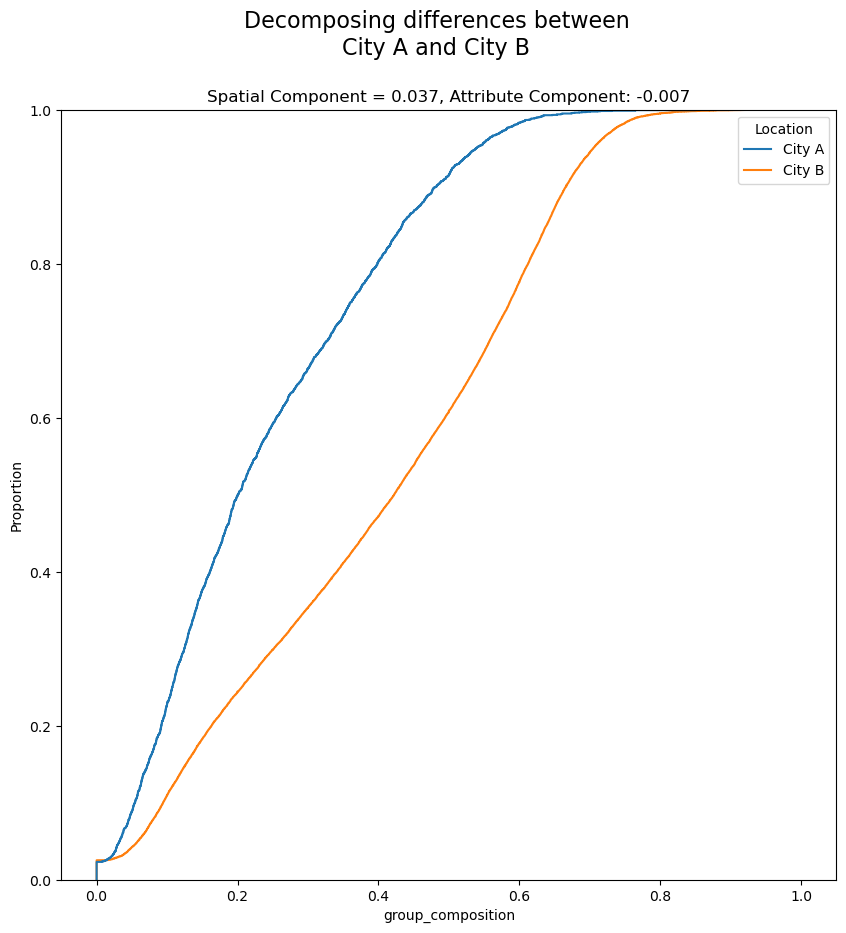

In [11]:
DS_composition.plot(plot_type = 'cdfs')

array([[<Axes: title={'center': 'City A\nOriginal Composition'}>,
        <Axes: title={'center': 'City B\nCounterfactual Composition'}>],
       [<Axes: title={'center': 'City A\nCounterfactual Composition'}>,
        <Axes: title={'center': 'City B\nOriginal Composition'}>]],
      dtype=object)

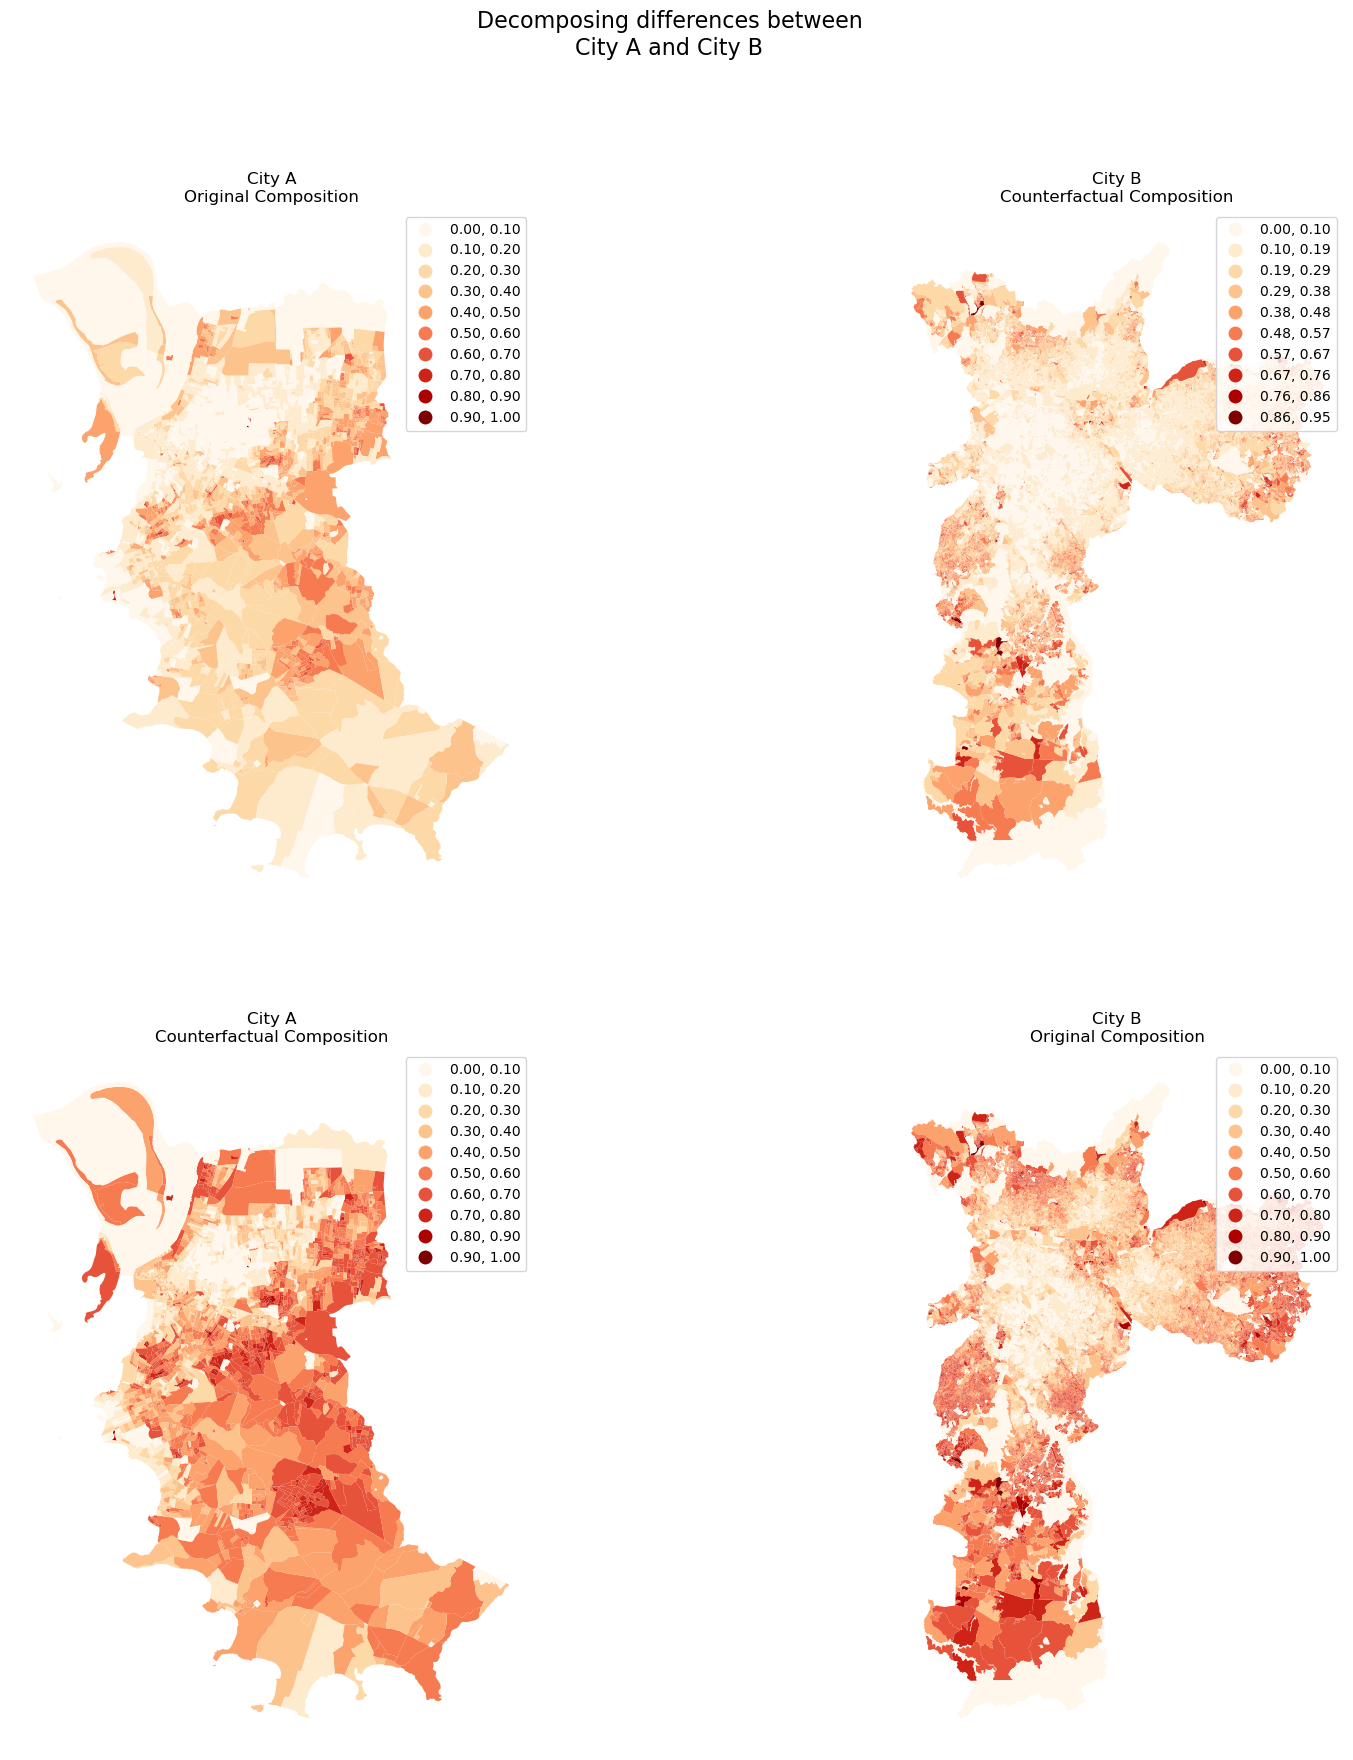

In [12]:
DS_composition.plot(plot_type = 'maps')

# Spatial Dissimilarity

In [ ]:
DS_composition = decomposition.DecomposeSegregation(all_segs_city_1[1], all_segs_city_2[1])
print(f'Spatial Component: {DS_composition.c_s}')
print(f'Attribute Component: {DS_composition.c_a}')
print(f'Spatial Share (%): {abs(DS_composition.c_s) / (abs(DS_composition.c_s) + abs(DS_composition.c_a))}')
print(f'Attribute Share (%): {abs(DS_composition.c_a) / (abs(DS_composition.c_s) + abs(DS_composition.c_a))}')

Spatial Share: 0.642376891291313


Attribute Share: 0.357623108708687
